In [3]:
import pandas as pd
df = pd.read_json('lastdata_git_api_std.json')

In [4]:
df = df.sort_index(ascending=False).drop_duplicates("repo_url")

## 去重操作导致行索引不连续，重新设置行索引

In [5]:
df.reset_index(drop=True, inplace=True)

In [4]:
df

,forks_count,latest_issues_created_at,latest_issues_updated_at,open_issues_count,readme_size,repo_created_at,repo_kept_time,repo_name,repo_size,repo_updated_at,repo_url,star_counts,subscribe_count
0,0,NaT,NaT,0,4468.0,2018-12-14,128,classification-ensembles,16,2019-04-21,https://github.com/EliPassov/classification-en...,2,0
1,44,2019-07-18,2019-07-30,4,4286.0,2018-12-24,220,batch-feature-erasing-network,32,2019-08-01,https://github.com/daizuozhuo/batch-feature-er...,180,6
2,27,2019-04-18,2019-04-18,13,1132.0,2017-10-11,652,Adaptive,240921,2019-07-25,https://github.com/yufengm/Adaptive,72,3
3,3,NaT,NaT,0,1010.0,2019-01-15,168,HSRL,11112,2019-07-02,https://github.com/fuguoji/HSRL,4,2
4,0,NaT,NaT,0,379.0,2018-11-27,213,proteinatlax,1896,2019-06-28,https://github.com/alexz01/proteinatlax,1,0
5,1,NaT,NaT,0,176.0,2019-05-30,7,FluidFlowPrediction,683,2019-06-06,https://github.com/EiffL/FluidFlowPrediction,3,1
6,1,NaT,NaT,0,3219.0,2019-03-19,129,RLdecoding,1298,2019-07-26,https://github.com/fabriziocarpi/RLdecoding,1,4
7,3,NaT,NaT,4,NaN,2017-11-17,606,PWA,1658406,2019-07-16,https://github.com/XJhaoren/PWA,27,1
8,0,NaT,NaT,0,NaN,2019-05-30,3,WGAN_WGAN-GP,338832,2019-06-02,https://github.com/maxmax1992/WGAN_WGAN-GP,0,1
9,3,NaT,NaT,0,1447.0,2017-11-18,560,gan-weightnorm-resnet,4208,2019-06-01,https://github.com/stormraiser/gan-weightnorm-...,11,2


In [7]:
count = 0
for i in range(len(df)):
    if df['repo_size'][i] < 1000:
        #print(df['repo_url_x'][i])
        count += 1
print(count)

8453


In [111]:
star = []
for i in range(len(df)):
    star.append(df["star_counts"][i])

In [19]:
len(star)

19793

In [21]:
new_star1 = [i for i in star if i < 1000]
new_star2 = [i for i in star if i < 100]
new_star3 = [i for i in star if i < 10]
print(len(new_star1))

19397


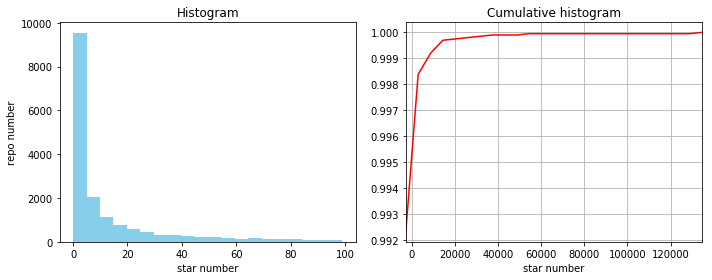

In [157]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(star, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_star2, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("star number")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
ax2.grid()
ax2.set_xlabel("star number")
plt.tight_layout()
plt.savefig('_git_star.png')

In [113]:
fork = []
for i in range(len(df)):
    fork.append(df["forks_count"][i])

In [24]:
new_fork1 = [i for i in fork if i < 1000]
new_fork2 = [i for i in fork if i < 100]
new_fork3 = [i for i in fork if i < 10]
print(len(new_fork3))

14960


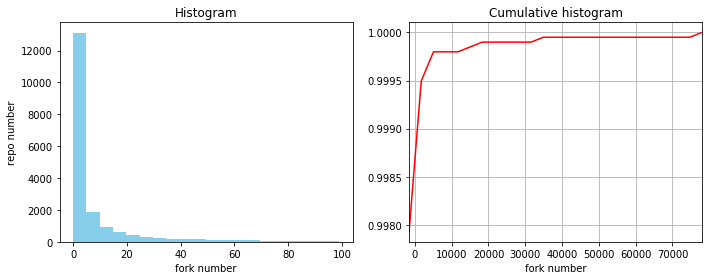

In [156]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(fork, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_fork2, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("fork number")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
ax2.set_xlabel("fork number")
ax2.grid()
plt.tight_layout()
plt.savefig('_git_fork.png')

In [115]:
watch = []
for i in range(len(df)):
    watch.append(df["subscribe_count"][i])

In [27]:
new_watch1 = [i for i in watch if i < 1000]
new_watch2 = [i for i in watch if i < 100]
new_watch3 = [i for i in watch if i < 10]
print(len(new_watch3))

16882


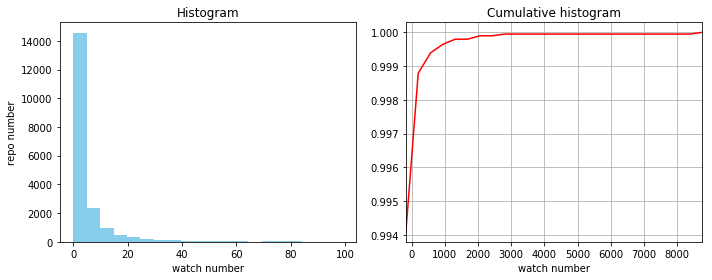

In [154]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(watch, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_watch2, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("watch number")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
ax2.set_xlabel("watch number")
#ax2.set_ylabel("frequency")
ax2.grid()
plt.tight_layout()
plt.savefig('_git_watch.png')

In [144]:
name1 = dict()
for i in range(len(df)):
    if df["star_counts"][i] > 5000:
        name1[df["repo_name"][i]] = df["star_counts"][i]
sorted(name.items(), key=lambda item:item[1], reverse=True)

[('tensorflow', 131710),
 ('models', 55859),
 ('scikit-learn', 36320),
 ('pytorch', 30261),
 ('caffe', 28655),
 ('Detectron', 21254),
 ('gym', 17578),
 ('bert', 17007),
 ('neural-style', 16940),
 ('waifu2x', 15312),
 ('fastai', 14785),
 ('openpose', 13687),
 ('magenta', 13626),
 ('Mask_RCNN', 13244),
 ('WaveFunctionCollapse', 12189),
 ('DeepSpeech', 10765),
 ('pix2code', 10351),
 ('pytorch-transformers', 9923),
 ('FastPhotoStyle', 9757),
 ('char-rnn', 9541),
 ('LightGBM', 9214),
 ('deep-photo-styletransfer', 9184),
 ('pytorch-CycleGAN-and-pix2pix', 9051),
 ('Theano', 8852),
 ('facenet', 8688),
 ('tensor2tensor', 8449),
 ('EffectiveTensorflow', 8424),
 ('dopamine', 8147),
 ('fast-style-transfer', 8138),
 ('ray', 8085),
 ('DeOldify', 7286),
 ('horovod', 7054),
 ('conv_arithmetic', 6938),
 ('ganhacks', 6852),
 ('flair', 6745),
 ('pix2pix', 6743),
 ('allennlp', 6724),
 ('vid2vid', 6645),
 ('vowpal_wabbit', 6469),
 ('ml-agents', 6400),
 ('kaldi', 6375),
 ('pysc2', 6218),
 ('lime', 6210),
 (

In [122]:
name = []
for i in range(len(df)):
    if df["forks_count"][i] > 5000:
        print(df["repo_name"][i])

tensorflow
fastai
scikit-learn
models
pytorch
caffe
Mask_RCNN


In [126]:
name = []
for i in range(len(df)):
    if df["subscribe_count"][i] > 5000:
        print(df["repo_name"][i])

tensorflow


In [118]:
readme = []
for i in range(len(df)):
    if np.isnan(df["readme_size"][i]):
        readme.append(0)
    else:
        readme.append(df["readme_size"][i])

In [30]:
new_readme1 = [i for i in readme if i < 20000]
new_readme2 = [i for i in readme if i < 100]
len(new_readme1)

19540

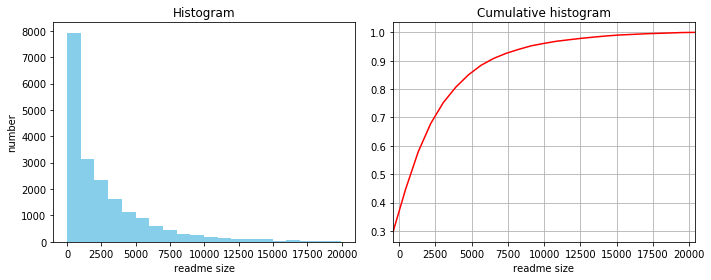

In [153]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(new_readme1, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_readme1, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("readme size")
ax1.set_ylabel("number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("readme size")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_readme.png')

In [42]:
kept_time = []
readme = []
count = 0
for i in range(len(df)):
    if not df["repo_kept_time"][i].isdigit():
        kept_time.append(0)
        count += 1
        continue
    kept_time.append(int(df["repo_kept_time"][i]))
    #if df["readme_size"][i] > 5000:
        #print(df["repo_name"][i])
print(count)

2012


In [96]:
new_kept_time = [i for i in kept_time if i < 1000]

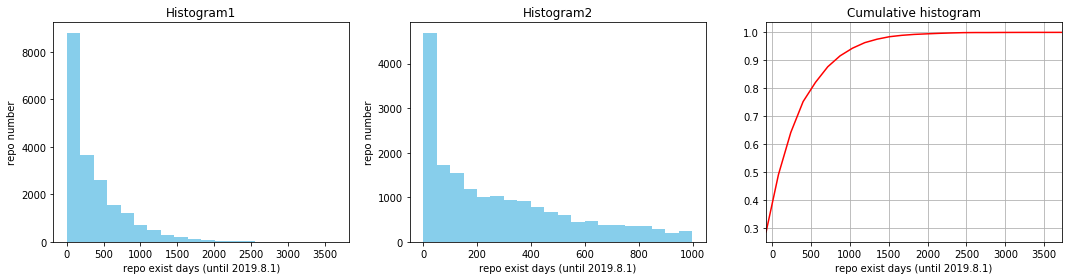

In [152]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(kept_time, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 3)
ax3 = fig.add_subplot(1, 3, 2)
ax1.hist(kept_time, bins=20, color="skyblue")
ax1.set_title('Histogram1')
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.grid()
ax2.set_xlabel("repo exist days (until 2019.8.1)")
ax1.set_xlabel("repo exist days (until 2019.8.1)")
ax3.set_xlabel("repo exist days (until 2019.8.1)")
ax1.set_ylabel("repo number")
ax3.set_ylabel("repo number")
#ax2.set_ylabel("frequency")
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
ax3.hist(new_kept_time, bins=20, color="skyblue")
ax3.set_title('Histogram2')
plt.tight_layout()
plt.savefig('_repo_kept_time.png')

In [287]:
date = dict()
for i in range(len(df)):
    year = str(df["repo_created_at"][i])[:4]
    #print(year)
    if year not in date:
        date[year] = 1
    else:
        date[year] += 1

In [288]:
date = dict(sorted(date.items()))

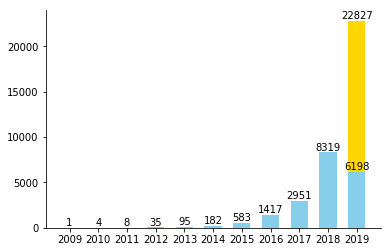

In [280]:
x = np.arange(5)

value = list(date.values())
y = np.array(value[5:10])
from scipy.optimize import curve_fit
def func1(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func1, x, y)
a = popt[0] 
b = popt[1]
c = popt[2]
yvals = [func1(i,a,b,c) for i in x] #拟合y值
y_es = func1(5, a, b, c)


import matplotlib.pyplot as plt
import numpy as np
X = np.arange(len(date)) + 1
y = list(date.values())
y_e = [0,0,0,0,0,0,0,0,0,0,y_es-y[-1]]

p1 = plt.bar(X, y, width=0.6, color="skyblue")
p2 = plt.bar(X, y_e, width=0.6, bottom=y, color="gold")
plt.xticks(X,date.keys(), fontsize=10)
for a, b in zip(X, date.values()):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.text(11, 22827+0.05, '%.0f' % 22827, ha='center', va= 'bottom',fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('newrepo_number_1.png')

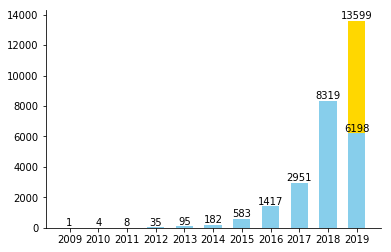

In [354]:
x = np.arange(5)

value = list(date.values())
y = np.array(value[5:10])
from scipy.optimize import curve_fit
def func2(x, a, b, c):
    return a * x * x + b * x + c
popt, pcov = curve_fit(func2, x, y)
a = popt[0] 
b = popt[1]
c = popt[2]
yvals = [func2(i,a,b,c) for i in x] #拟合y值
y_es = func2(5, a, b, c)

import matplotlib.pyplot as plt
import numpy as np
X = np.arange(len(date)) + 1
y = list(date.values())
y_e = [0,0,0,0,0,0,0,0,0,0,y_es-y[-1]]
#print(y_es)
p1 = plt.bar(X, y, width=0.6, color="skyblue")
p2 = plt.bar(X, y_e, width=0.6, bottom=y, color="gold")
plt.xticks(X,date.keys(), fontsize=10)
for a, b in zip(X, date.values()):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10) 
plt.text(11, 13599+0.05, '%.0f' % 13599, ha='center', va= 'bottom',fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('newrepo_number_2.png')

In [282]:
df = df.fillna(-1)

In [289]:
df

,forks_count,latest_issues_created_at,latest_issues_updated_at,open_issues_count,readme_size,repo_created_at,repo_kept_time,repo_name,repo_size,repo_updated_at,repo_url,star_counts,subscribe_count
0,0,-1,-1,0,4468.0,2018-12-14,128,classification-ensembles,16,2019-04-21,https://github.com/EliPassov/classification-en...,2,0
1,44,2019-07-18 00:00:00,2019-07-30 00:00:00,4,4286.0,2018-12-24,220,batch-feature-erasing-network,32,2019-08-01,https://github.com/daizuozhuo/batch-feature-er...,180,6
2,27,2019-04-18 00:00:00,2019-04-18 00:00:00,13,1132.0,2017-10-11,652,Adaptive,240921,2019-07-25,https://github.com/yufengm/Adaptive,72,3
3,3,-1,-1,0,1010.0,2019-01-15,168,HSRL,11112,2019-07-02,https://github.com/fuguoji/HSRL,4,2
4,0,-1,-1,0,379.0,2018-11-27,213,proteinatlax,1896,2019-06-28,https://github.com/alexz01/proteinatlax,1,0
5,1,-1,-1,0,176.0,2019-05-30,7,FluidFlowPrediction,683,2019-06-06,https://github.com/EiffL/FluidFlowPrediction,3,1
6,1,-1,-1,0,3219.0,2019-03-19,129,RLdecoding,1298,2019-07-26,https://github.com/fabriziocarpi/RLdecoding,1,4
7,3,-1,-1,4,-1.0,2017-11-17,606,PWA,1658406,2019-07-16,https://github.com/XJhaoren/PWA,27,1
8,0,-1,-1,0,-1.0,2019-05-30,3,WGAN_WGAN-GP,338832,2019-06-02,https://github.com/maxmax1992/WGAN_WGAN-GP,0,1
9,3,-1,-1,0,1447.0,2017-11-18,560,gan-weightnorm-resnet,4208,2019-06-01,https://github.com/stormraiser/gan-weightnorm-...,11,2


In [307]:
import time
import datetime
def caltime(date1, date2):
    # print(date1)
    date1 = time.strptime(date1, "%Y-%m-%d")
    date2 = time.strptime(date2, "%Y-%m-%d")
    date1 = datetime.datetime(date1[0], date1[1], date1[2])
    date2 = datetime.datetime(date2[0], date2[1], date2[2])
    return str((date2 - date1)).replace(" days, 0:00:00", "")

In [310]:
active = []
for i in range(len(df)):
    if df["latest_issues_updated_at"][i] == -1:
        continue
    updated_time = str(df["latest_issues_updated_at"][i])[:10]
    if updated_time == "0:00:00":
        continue
    active.append(int(caltime(updated_time, '2019-08-05')))

In [320]:
new_active1 = [i for i in active if i < 1000]
new_active2 = [i for i in active if i < 100]
print(max(new_active1))
print(len(new_active2))

999
3111


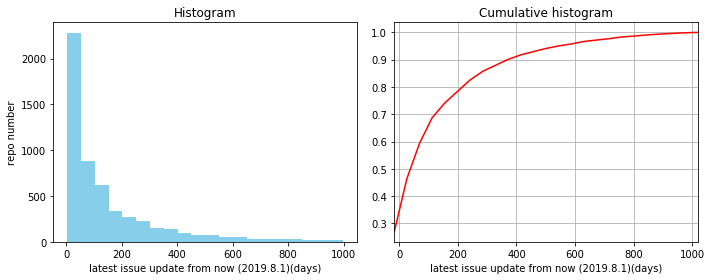

In [353]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(new_active1, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_active1, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("latest issue update from now (2019.8.1)(days)")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("latest issue update from now (2019.8.1)(days)")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_active.png')

In [250]:
df

,forks_count,latest_issues_created_at,latest_issues_updated_at,open_issues_count,readme_size,repo_created_at,repo_kept_time,repo_name,repo_updated_at,repo_url,star_counts,subscribe_count
0,2,-1,-1,0,967.0,2018-02-20,459,robot_learning,2019-05-25,https://github.com/mcgillmrl/robot_learning,12,1
1,2,2019-07-18 00:00:00,2019-07-18 00:00:00,3,2599.0,2018-12-17,223,few-shot-ctm,2019-07-28,https://github.com/Clarifai/few-shot-ctm,33,13
2,3,-1,-1,0,2741.0,2018-05-08,397,SVHN_CNN,2019-06-09,https://github.com/beeps82/SVHN_CNN,8,1
3,1,-1,-1,0,2333.0,2019-03-01,149,DukeMTMC-SI-Tracklet,2019-07-28,https://github.com/liminxian/DukeMTMC-SI-Tracklet,7,0
4,358,2019-06-20 00:00:00,2019-06-20 00:00:00,28,5514.0,2017-06-01,786,gcForest,2019-07-27,https://github.com/kingfengji/gcForest,928,84
5,2,2019-01-28 00:00:00,2019-01-28 00:00:00,2,3321.0,2018-07-07,256,mgrf-develop,2019-03-20,https://github.com/rajkumarkarthik/mgrf-develop,1,3
6,0,-1,-1,0,10945.0,2018-10-11,117,zero,2019-02-05,https://github.com/bzhangGo/zero,3,2
7,9,2018-11-20 00:00:00,2018-11-20 00:00:00,2,1235.0,2017-11-07,625,BackpropThroughTheVoidRL,2019-07-25,https://github.com/wgrathwohl/BackpropThroughT...,36,3
8,55,2019-02-20 00:00:00,2019-02-20 00:00:00,3,3598.0,2016-12-13,936,TemporalConvolutionalNetworks,2019-07-07,https://github.com/colincsl/TemporalConvolutio...,150,10
9,8,-1,-1,0,9735.0,2017-06-16,755,US-TransportationMode,2019-07-11,https://github.com/vlomonaco/US-Transportation...,12,3


In [325]:
open_issue = []
count = 0
for i in range(len(df)):
    open_issue.append(df["open_issues_count"][i])
    if df["open_issues_count"][i] == 0:
        count += 1
print(count)

12988


In [337]:
new_open_issue1 = [i for i in open_issue if i < 1000 and i > 0]
new_open_issue2 = [i for i in open_issue if i < 50 and i > 0]

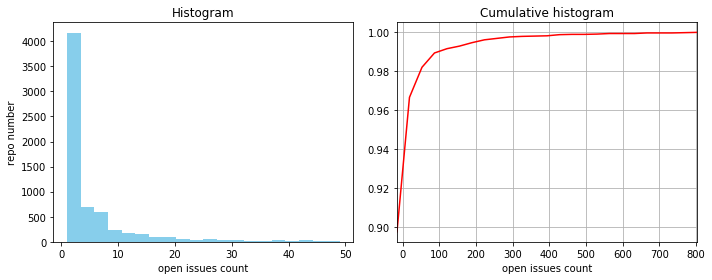

In [352]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(new_open_issue1, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_open_issue2, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("open issues count")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("open issues count")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_issues.png')

In [341]:
repo_updated = []
count = 0
for i in range(len(df)):
    if df["repo_updated_at"][i] == -1:
        count += 1
        continue
    updated_time = str(df["repo_updated_at"][i])[:10]
    #print(updated_time)
    #print(caltime(updated_time, '2019-7-30'))
    repo_updated.append(int(caltime(updated_time, '2019-8-5')))

In [347]:
new_repo_updated1 = [i for i in repo_updated if i < 300]
new_repo_updated2 = [i for i in repo_updated if i < 500]
new_repo_updated3 = [i for i in repo_updated if i < 100]
new_repo_updated4 = [i for i in repo_updated if i < 10]
print(len(new_repo_updated1))
print(len(new_repo_updated2))
print(len(new_repo_updated3))
print(len(new_repo_updated4))

18165
19438
13621
4742


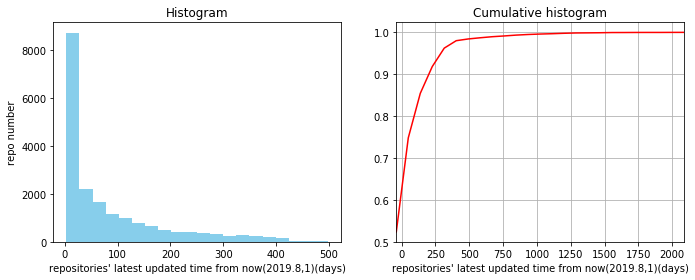

In [351]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(repo_updated, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_repo_updated2, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("repositories' latest updated time from now(2019.8,1)(days)")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("repositories' latest updated time from now(2019.8,1)(days)")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_repo_updated.png')

In [370]:
repo_size = []
for i in range(len(df)):
    repo_size.append(df["repo_size"][i])
new_repo_size1 = [i for i in repo_size if i < 30000]
new_repo_size2 = [i for i in repo_size if i < 100000]

In [366]:
print(len(repo_size))
print(len(new_repo_size1))

19793
16070


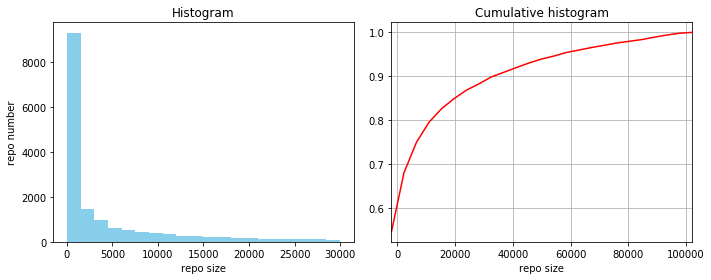

In [371]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
res = stats.cumfreq(new_repo_size2, numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(new_repo_size1, bins=20, color="skyblue")
ax1.set_title('Histogram')
ax1.set_xlabel("repo size")
ax1.set_ylabel("repo number")
ax2.plot(x, res.cumcount/res.cumcount.max(), color="red")
ax2.set_title('Cumulative histogram')
ax2.set_xlabel("repo size")
#ax2.set_ylabel("frequency")
ax2.grid()
ax2.set_xlim([x.min(), x.max()])
plt.tight_layout()
plt.savefig('_repo_size.png')